In [10]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from torchsummary import summary
import seaborn as sns

In [11]:
data = pd.read_csv("/Users/veera/Data/Repos/Udemy/.dataset/mnist_train.csv", delimiter=',', header=None)

In [12]:
labels = data[0]
data = data.drop(columns=[0])

In [13]:
data = np.array(data)
labels = np.array(labels)

In [14]:
# The min and max values of the data are 0 and 255
# It is normalized to 0 and 1
data_norm = data/np.max(data)

## Tensor dataset and loader

In [15]:
data_tensor = torch.tensor(data_norm).float()
label_tensor = torch.tensor(labels).long()

In [16]:
data_tensor

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [17]:
label_tensor

tensor([5, 0, 4,  ..., 5, 6, 8])

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data_tensor, label_tensor,train_size=0.8, stratify=label_tensor)

In [19]:
x_train.shape

torch.Size([48000, 784])

In [20]:
y_train.shape

torch.Size([48000])

In [21]:
train_data = TensorDataset(x_train, y_train)
test_data = TensorDataset(x_test, y_test)

In [22]:
train_data.tensors

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([2, 2, 6,  ..., 1, 1, 2]))

In [23]:
test_data.tensors

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([5, 9, 7,  ..., 8, 1, 3]))

In [24]:
train_loader = DataLoader(train_data, batch_size=64, drop_last=True, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [25]:
for i in test_loader:
    print(i[0].shape, i[1].shape)

torch.Size([12000, 784]) torch.Size([12000])


In [26]:
%whos

Variable           Type             Data/Info
---------------------------------------------
DataLoader         type             <class 'torch.utils.data.dataloader.DataLoader'>
F                  module           <module 'torch.nn.functio<...>/torch/nn/functional.py'>
TensorDataset      type             <class 'torch.utils.data.dataset.TensorDataset'>
data               ndarray          60000x784: 47040000 elems, type `int64`, 376320000 bytes (358.88671875 Mb)
data_norm          ndarray          60000x784: 47040000 elems, type `float64`, 376320000 bytes (358.88671875 Mb)
data_tensor        Tensor           tensor([[0., 0., 0.,  ...<...>, 0.,  ..., 0., 0., 0.]])
i                  list             n=2
label_tensor       Tensor           tensor([5, 0, 4,  ..., 5, 6, 8])
labels             ndarray          60000: 60000 elems, type `int64`, 480000 bytes (468.75 kb)
nn                 module           <module 'torch.nn' from '<...>es/torch/nn/__init__.py'>
np                 module         

## Model

In [27]:
def create_model():
    class ann(nn.Module):
        def __init__(self):
            super().__init__()
            
            self.input = nn.Linear(784, 32)
            self.hidden1 = nn.Linear(32, 32)
            self.hidden2 = nn.Linear(32, 32)
            self.output = nn.Linear(32, 10)

        def forward(self, x):
            x = F.relu(self.input(x))
            x = F.relu(self.hidden1(x))
            x = F.relu(self.hidden2(x))
            x = F.relu(self.output(x))
            return torch.log_softmax(x, axis=1)
        #  log-softmax the output, because I am using NLLLoss instead of CrossEntropy
    net = ann()
    lossfn = nn.NLLLoss()
    # NegativeLogLikelihood
    opt = torch.optim.Adam(net.parameters(), lr=0.01)

    return net, lossfn, opt

In [28]:
net, lossfn, opt = create_model()

In [29]:
net

ann(
  (input): Linear(in_features=784, out_features=32, bias=True)
  (hidden1): Linear(in_features=32, out_features=32, bias=True)
  (hidden2): Linear(in_features=32, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=10, bias=True)
)

# Deep dive into models

In [30]:
vars(net.input)

{'training': True,
 '_parameters': OrderedDict([('weight', Parameter containing:
               tensor([[-0.0144, -0.0304,  0.0322,  ...,  0.0287,  0.0047, -0.0030],
                       [ 0.0331, -0.0087,  0.0324,  ..., -0.0290, -0.0305,  0.0334],
                       [-0.0226,  0.0095,  0.0346,  ..., -0.0279,  0.0146,  0.0123],
                       ...,
                       [ 0.0307, -0.0004, -0.0031,  ...,  0.0230,  0.0194,  0.0325],
                       [-0.0307, -0.0313,  0.0015,  ...,  0.0073,  0.0291, -0.0027],
                       [ 0.0134,  0.0059,  0.0243,  ..., -0.0354, -0.0348,  0.0058]],
                      requires_grad=True)),
              ('bias',
               Parameter containing:
               tensor([-0.0285,  0.0079,  0.0206, -0.0205,  0.0222,  0.0227, -0.0112, -0.0121,
                        0.0298,  0.0249,  0.0285, -0.0220, -0.0223,  0.0109, -0.0271,  0.0267,
                        0.0265, -0.0255, -0.0154, -0.0074, -0.0087, -0.0112, -0.0014, 

In [31]:
print(net.input.weight.size())
(net.input.weight)

torch.Size([32, 784])


Parameter containing:
tensor([[-0.0144, -0.0304,  0.0322,  ...,  0.0287,  0.0047, -0.0030],
        [ 0.0331, -0.0087,  0.0324,  ..., -0.0290, -0.0305,  0.0334],
        [-0.0226,  0.0095,  0.0346,  ..., -0.0279,  0.0146,  0.0123],
        ...,
        [ 0.0307, -0.0004, -0.0031,  ...,  0.0230,  0.0194,  0.0325],
        [-0.0307, -0.0313,  0.0015,  ...,  0.0073,  0.0291, -0.0027],
        [ 0.0134,  0.0059,  0.0243,  ..., -0.0354, -0.0348,  0.0058]],
       requires_grad=True)

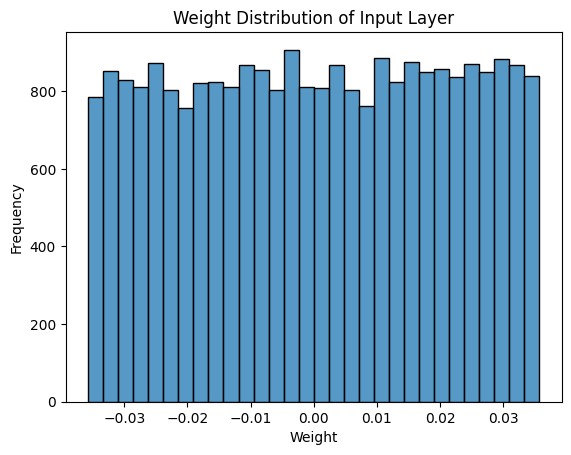

In [32]:
sns.histplot(net.input.weight.detach().numpy().flatten())
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Weight Distribution of Input Layer")
plt.show()

In [33]:
for i in net.parameters():
    print(i.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([32, 32])
torch.Size([32])
torch.Size([32, 32])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [34]:
def plot_histogram(net):
    w = np.array([])
    for layer in net.parameters():
        w = np.concatenate((w, layer.detach().flatten().numpy()))
    
    histy, histx = np.histogram(w, bins=np.linspace(-0.8, 0.8, 101), density=True)
    histx = (histx[1:]+histx[:-1])/2

    return histx, histy

In [35]:
histx, histy = plot_histogram(net)

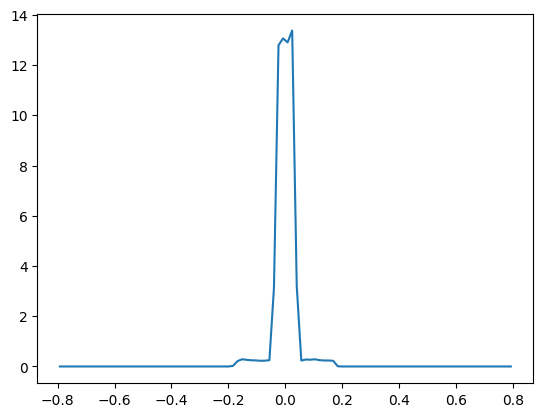

In [36]:
plt.plot(histx, histy)

In [37]:
summary(net, (10,784))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 10, 32]          25,120
            Linear-2               [-1, 10, 32]           1,056
            Linear-3               [-1, 10, 32]           1,056
            Linear-4               [-1, 10, 10]             330
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.03
Forward/backward pass size (MB): 0.01
Params size (MB): 0.11
Estimated Total Size (MB): 0.14
----------------------------------------------------------------


In [38]:

def train():
    epochs = 50
    net, lossfn, opt = create_model()

    losses = []
    train_acc = []
    test_acc = []
    histx = np.zeros((epochs, 100))
    histy = np.zeros((epochs, 100))

    for i in range(epochs):
        histx, histy[i,:] = plot_histogram(net)
        # training
        batchacc = []
        batchloss = []
    
        for trainx, trainy in train_loader:
            # batch train
            yhat = net(trainx)
            loss = lossfn(yhat, trainy)

            opt.zero_grad()
            loss.backward()
            opt.step()

            batchloss.append(loss.item())
            matches = torch.argmax(yhat, axis=1) == trainy # Booleans
            matches_num = matches.float() # convert booleans to numbers
            accuracy = 100 * torch.mean(matches_num)
            batchacc.append(accuracy)
        train_acc.append(np.mean(batchacc))
        losses.append(np.mean(batchloss))

        # testing
        testx, testy = next(iter(test_loader))
        yhat = net(testx)

        test_acc.append(100*torch.mean((torch.argmax(yhat, axis=1)==testy).float()))
    return train_acc, test_acc, losses, histx, histy

In [39]:
train_acc, test_acc, losses, histx, histy = train()

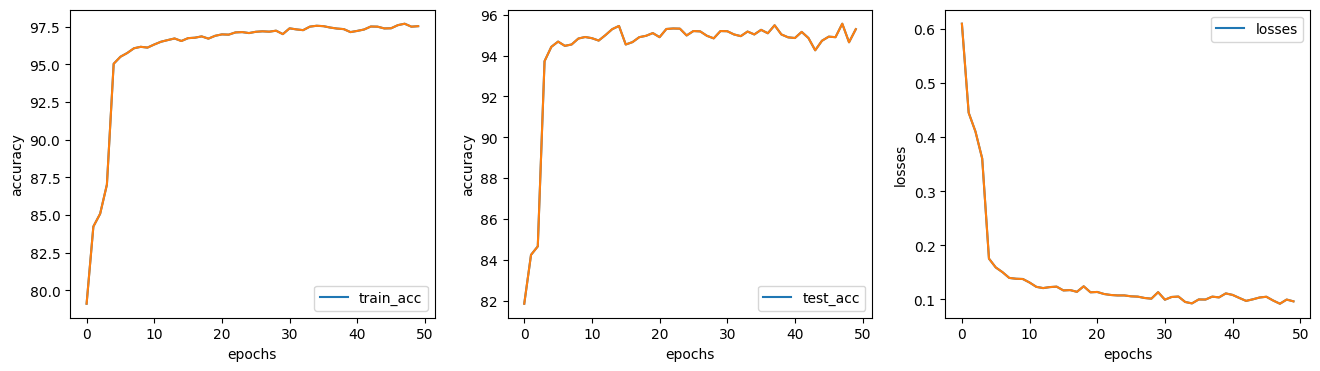

In [40]:
fig, ax = plt.subplots(1, 3, figsize=(16,4))
ax[0].plot(range(50), train_acc)
ax[0].plot(range(50), train_acc)
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')
ax[0].legend(['train_acc'])

ax[1].plot(range(50), test_acc)
ax[1].plot(range(50), test_acc)
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].legend(['test_acc'])


ax[2].plot(range(50), losses)
ax[2].plot(range(50), losses)
ax[2].set_xlabel('epochs')
ax[2].set_ylabel('losses')
ax[2].legend(['losses'])

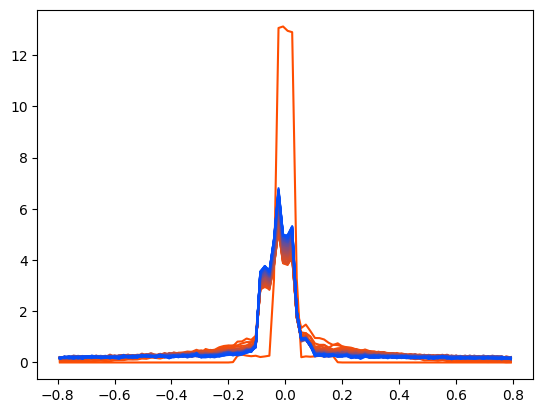

In [41]:
for i in range(50):
    plt.plot(histx, histy[i,:], color=[1-i/50, 0.3, i/50])